# Multiple Linear Regression

# importing relevants libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
#To be added later
import seaborn as sns
sns.set()

# load the data

In [9]:
data = pd.read_csv('1.02. Multiple linear regression.csv')

# view data

In [10]:
data

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


# create your first multiple regression.

## this data is same data we had last time but a slide diff. as it has Random numbers ranging from 1-3 assigned to each variable. and we are 100% sure that this variables cannot predict college GPA, so our new model is:
# GPA = b0 + b1SAT + b2Rand1,2,3
# ie GPA = b0 plus b1 multiply SAT Plus b2 multiply by the random numbers..

# let's describe the table

In [11]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


# Creating our fist multiple regression. just as y = GPA, this time we have two explanatory variables, x = SAT and Random variable, what we can do is to declaire x1 as a dataframe containing the two. [[data-frame]]. the rest remains unchanged

In [12]:
y = data['GPA']
x1 = data[['SAT', 'Rand 1,2,3']]

In [13]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           6.58e-10
Time:                        20:06:19   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## from here let's compare this table to the old one.
### $R^2$ of the old is 0.406 as the new one is 0.407 (explanatory power of the model is increased). 
### the adjusted $R^2$ of the old is 0.392 as the new one is 0.399. (there's enthusiasm by the adjusted $R^2$, we were penalized for adding an additional variable that had no strong explanatory power, therefore we have added an informations but lost value...).
##### the point is you should chealy pick data and exclude useless informations, however one would assume that regression analysis is smatter than that right? adding impractical variable should be pointed out by the model itself somewhere, well you're right.
# look at the coefficient table, we have determine the coefficient from Rand 1,2,3 variable but it's P>|t| value is 0.762, remember the non hypothesis of the test. [H0: B = 0]. we cannot reject the null hypothesis at 76% insignificant level, this is incredibly high.

# Note: for a coefficient to be statictical significant we want the p-value to be < 0.05.

# therefore our conclussion is that the variable Random 1,2,3 not only worsens the explanatory power reflected by the lower adjusted $R^2$, but is also insignificant, therefore we need to drop it totally. Dropping useles variables is very important. we can se that the original model dropped from:

# yhat = 0.275 + 0.0017X1 to yhat = 0.296 + 0.0017X1 - 0.0083X2.

# the choice of third variable (Df Model) affects the intercept 0.275 and 0.296, therefore whenever you have one variable that's ruing the model do not use them all together. simply because the bias of this variable is reflected into the coefficients of the others, the solution is removing it and running a new one, omitting the problematic predictor.
### there's one more consideration of removing a variable from a model. 
## we can add 100 variables to a model, but this strategy makes regression anylysis futile.
# finally the adjusted $R^2$ is the basis for comparing models. it's always make sense to comapre variable of:
# 1. Same dependent varibles(y)
# 2. Same Dataset.
#### if we make comparism of two different variables we'll making apples and orange comparism.
#### if its of different dataset it's then apple and crocodile.
## as you can see adjust $R^2$ can step in the right direction but cannot be the only measure trusted, causion is adviced where as totor logic and deligence are mandatory. 
# in our next lesson we'll learn how to assess the overall significance of the model

# Test for Significant of model(F-Test) 

# one of the measures we haven't spoken about is the F-statistic in the table,.

## much like the Z- statistic that follows on normal distributions and the T-statistic that follows on student T distribution, the F-statistic follow on F-distribution, am calling it statistic because it used for test right? . 
# the F-statistic Test is used for testing overall significance of te model.
## the null bypotheses says all the Beta's are equal simutaneously, the alternative hypothesis says at least one Beta defauts from 0. ie hypothesis => H0:B1 = B2 =...=Bk = 0.
## why defaults hypothesis => H1:  at least one B1 != 0.

# what's the interpretation? ie if all beta's are 0 then none of the independent variables (Xs) matters,  => our model has no merit

# let's see the regression summary from the SAT GPA lecture. the F-statistic is 56.05, the cell below is the P-value 7.20e-11, the number is very low it's -0.000, we said overall model is significant, the F-test is important for regression, as it gives us some important insight. now let's the table for the model where we added the Random 1,2,3, that had nothing to do with anything, which the F-statistic is 27.76, and the P-value is -0.000.
## now you can see the F-statistic in our first table is lower than the one that has the Random numbers. therefore...
#  the lower the F-statistic the closer to a non-significant model, this yet another tool that allows us to compare models, okay that was the tool for overall signinficant models, don't forget to look for the three zeros after the dot.

# OLS Assumption.


# so far we've introduced much about. of course most statistic books teaches regression assumption first, we prefare to teach below first, then introduce you to regression Assumption.
# Regressions
# Causation
# Simple LR Model
# Multiple LR model
# Geometric repres
# SST, SSR, SSE
# OLS
# R-Squared
# Adjusted R-Squared
# F-Test.
## now after covering all the above topics we can now introduce you to regression assumption

# REGRESSION ASSUMPTION: in this lecture we divide them into five(5) assumptions, and you should know all of them before performing any regression analysis, we'll have a seperate lesson for one of, and they're:

# 1. Linearity(Simplest)=> y = B0 +B1x1 +B2x2 +...+Bkxk + E (Each independent variable is multiplied by the coefficient and sum up to predict the result)
# 2. No Endogeneity of regressor(expressed as the co-variance of the error of x's is 0 for any error or X)=> QXE = ):VcrossX,E
# 3. Normality and Homoscedasticity(Normality means that the error term is normally distributted as the expected error=0. while Homoscedasticity in plain english means constant variance)=> E ~ N(0,Q^2)
# 4. No autocorrelation(ie the co-variance for any terms =0)=> QEiEj = 0:Vcross,i != j (that is the assumption that would stop u from using linear regession)
# 5. No Multicollinearity(Multicollinearity is observed when two or more variables has multi-correlations betwen each other).

## these are the main regresion assumptions, they're crucial for regression analysis.

#### at your work place the biggest mistake you can make is to perform a regression that violates one of these assumptions above.


# LINEARITY

## just we explained a linear regression is the simplest non trivial relationship. it's called linear because the equation is linear =>  y = B0 +B1x1 +B2x2 + E.
## Each independent variable is multiplied by the coefficient and sumed up to predict the dependent variable.
### how can you verify if the relationship between multiple variables is linear? the easist way is to choose the independent variable X1 and plot it against the dependent varivale y on a scatter plot, if the data-point falls patterns that looks like a stright line, then linear regression model is suitable just like the ones we've been using since.

# what about trying to plot Y againt X, which might bend the regression line. well this would violets the usage of linear regression, rather a curved line would be great.

# FIXES for Linearity:
### linearity seems straightive but there are easy fixes for it.
# a. You ca run a non-linear regression or transform the relationship(Nxt lesson)
# b. there are exponential transformation
# c. there are Log transformation

# 2. NO ENDOGENEITY OF REGRESSORS

# this reverses the probation of a line between the independent variables and the errors.
# Mathematically expressed in the following way: QXE = 0: Vcrosed X, E.
# think about it! in this case the error does the difference between absorbed values and predicted values is corollected with our independent values.
## this is a problem refers to omitted variable value bias

# Omitted Variabe Bias: this is introduced to the model when you forget to include a relevant variable, just as each variables explains why they move together and somehwere correlated by Xs. ie(y is explained somewhat correlated by Xs)

# similarly Y is also explained by the omited variabele so they're also correlated ie (Y is explained somewhat correlated by omitted x).

# chances are the omitted variables are also correlated with at least one independent X ie (X and X are somewhat correlated). 
### however you forgot to include it as a regressor, therefore everything that you don't explain with your models goes into the error.  so the errors become correlated with everything else  

# Example: 
### imagine you're trying to predict the price of buidongs in LONDON based on size! ie price = F(size) this is a rigid model thas has explanatory power,  however from our sample seems that the smaller the size of the houses the higher the price. This is extremly kind of intuitive . 
# yhat = 11342786 - 132100x1.
### we look for remedies and it seems that the covariance of the independent of the variable in the error terms is not 0 ie 
# QXE != 0. i believe we're missing something crucial, omitted variable bias is hard to fix, think of those things you may have missed that led to poor result! Yhat = b0 + b1X1. we have only one variable but when your variable is exhausted with 10 variable or more you may feel dishertent or loose of hope ie (yhat = b0 + b1x1 + b2x2 + b3x3 + b4x4 + b5x5 + b6x6 + b7x7 + b8x8 + b9x9 + b10x10).
# CRITICAL thinking time: 
#### where do we draw the sample from? 
#### Can we get a better sample?
#### why is bigger real estate cheaper? 
##### alright let's explore more informations, the prices comprises apartment buildings in cental LONDON  and it's LARGE or BIG ENOUGH, so the problem is not with the sample:
## what is it about smaller size that is making it so expensive?
## Where are the small houses?

# well looking at the sample you realize the sample is from the city of LONDON, where many impoetants aspect of life is constantly going on. now what do you think we're missing? {LOCATION}, maybe in other places this might not be a factor, but in this our examples it's. now let's see the equation now.
# yhat = 520365 + 78210xsize + 7126579xcity, now larger properties are more expensive and vice viser. 
### IMPORTANT REMARK: the interactive exclusion of variable like in this place leads a bias to encoutering counterintuitive estimates that are toxic to your regression analysis .An incorrect inclussion of variable are we saw in our adjusted $R^2$ lecture (Random) lead to in efficient estimate which don't bias the regression and you can immidiatly drop them, but when in doubt just include the variable and try your luck . THEREFORE omitted bias variables is appended in the neck, as it's always:
<ul>
    <li> always different </li>
    <li> always sneaky </li>
    <li> only the experienced and advanced                knowledge can help </li>
    </ul>
# always check for it and if you can't think of anything ask the collegue for an assistant 
    

# NORMAL AND HOMOSCEDASTICITY
### E ~ N(0, $Q^2$)

# this comprises three parts:
<ol>
    <li>Normality</li>
    <li>Zero Mean</li>
    <li>Homoscedasticity</li>
</ol>

# 1. Normality: this is actually easy, just we assume the error term is normally distributed.
<b> Normal distribution is not required for creating regression,but for making inferences.
    Remember all regression tables were fall of T-stat. and F-stats?.

### well this terms  (t test and f test work because we have assumed the normality of the error terms). what shall we do if the error terms is not normally distributted? YES the central limit theorem, the large samples the central limit theorem applied for error terms too, therefore we can consider normality as a given for us.

# whata about the zero mean of the error terms ie(0,before the Q^2)? well if the mean is not expected to be zero then the line is not the best fitten one, however, havin an intercept solves that problem.  so in real life it's unusual to violate this part of the assumption. 

# What's HOMOSCEDASTICITY (Q^2)
<p> this simply means having an equal variance. so the error terms should have an equal variance with one another ie (Q^2E1 = Q^2E2 =...Q^2Ek = Q^2.
    what if there was pattern in the variance? well an example of a dataset where errors having a different variance stock in closer in the regression lines and going further away. (heteroscedastic dataset).
 This would imply that for smaller values for independent and dependent variables we would have a better prediction than for bigger values. And i asure you that we really dont like uncertainty

# REAL LIFE EXAMPLE
#### most examples related to income are heteroscedastic with varying variance, if the person is is poor he/she spends money things like food, entertainment, cloths etc. the Wealthier someone is the higher their expenditure. a poor person may be forced to eat garri in the moring, afternoon and night, same thing tomorrow, or addition of concussion rice etc(Low variability). A wealthy person may go the fancy or may go the restaurant throphous are served with a planty champagne and stay home and boil egg next day. the variability of spending habit is tremendous (High variability). therefore we expect  heteroscedasticity .

# PREVENTING HETEROSCEDASTICITY

### 1. Check for omitted variable bias (OVB).
### 2. Look for outlies and remove them
### 3. Log Transformation (this is the best friend of statistition)

##### [ Log Transformation]. Naturally log stands for logrithm, for each observations variables calculates the natural log and 
### 1. then take the log of the variable
### 2. then create a regression between the log of Y and the independent axis.  
##### conversionally you can take the independent  x that's creating you problems and do thesame.

# 4. No autocorrelation a.k.a no serial correlation

### well this is my least favourite as it cannot be the last.
### (ie the co-variance for any terms = 0, ie errors are assumed to be uncorrelated).
##### mathematically: => QEiEj = 0:Vcross,i != j.

###### where can we observe serial correlation between errors? it's highly unlikely to find a data taken one more mono time known as crossed sectional data. however it's very common in time series data. think about stock prices, everyday you have a new quote for thesame stock (Change every day), the numbers involved have thesame underlying asset. Without going deeper into the finance idealy you want them to be random or predicted by micro factors such as 
#### GDP
#### Tax rate 
#### political events and so on.

<b> unfutunately it's common under developed market to see patterns in the stock prices. there's a well known phenominom called THE-DAY-OF-THE-WEEk-EFFECT

# THE-DAY-OF-THE-WEEk-EFFECT.
<b>this consist disrespotion of high returns fridays and low returns on mondays.
    One possible explanation proposed by noble price person called [Miller], he said that industries don't have time to read all the news imidiatly, so they do that over the weekend. The first day to response to negative informations is on mondays(Sell on momdays). then during the week the advisers give them new positive information and they start buying on thursdays and fridays.
    Another famouse explanation is given by the disticquished financial CEO [Keneth French] who suggested forms delays bad news from the weekend therefore the market react on momdays.(It's the weekend.. Time to tell you that our firms is having difficulties)=> everybody sells on momdays.
    well whaterver the reason there's correlation of the errors  when building regression about stock prices, the 1st, observations the 6th the 11th and every 5th onward will be mondays, the 5th, 10th and so on will be fridays.
    Errors on mondays will be by standwards and errors on fridays will be stopwards the mathematics of linear regression does not consider this. It assume errors should be randomly spread around the regression line. so how does one detect autocorrelation?? </b>
  
    

# HOW TO DETECT AUTOCORRELATION.
<b> 1. the common way to detect autocorrelation is to plot all the residuals on the grapgh and look for patters, if you can't find any you're safe ie (If there are no patterns to be seen => no autocorrelation).
    2. another way is checking on the table you'll see [Durbin-watson]: which we have in summary for the table provided by stat models.
    Generally it' values falls between 0 and 4, 2 indicates no autocorrelation, while values below 1 and > 3 cause an alarm. 
    But what is the remedy we may ask? </b>

## Remedy for autocorrelation.
<b> the remedy is.... there's no remedy,well if you can remember from the begining of this lecture that we cannot relax this assumption.
    The only thing we can do is to avoid using linear regression in such a settin (When in the presence of autocorrelation avoid the linear regression model).
    There are other types of regressions to deal with time series data.</b>

## ALTERNATIVES.
<b>
 Since there are other types of regressions to deal with time series data, we can possibly use the following
    1. Autoregressive model
    2. Moving average model
    3. Autoregressive moving model
    4. Autoregressive integrated moving average model.
    make your choice your will, but don't use linear regressions when erroe terms are autocorelated
</b>

# NO MULTICOLLINEARITY (pxixj ~~ 1:Vcrsdi,j; i != j)

##### this is the last assumption. and this is observed when two or more variable have a high correlation. 

# EXAMPLIFY with an equation.
<b>
   a = 2 + 5 * b.
    a and b are two varibales with an exact linear combination ie a can be represented using b and b can repesented uding a ie
   b = a - 2 / 5, in a model containing a and b we would have pwerfect multicollinearity (Pab = 1), this emposes a big problem to our regression model as the coefficient could be wrongly estimated, the reason is that if a can be represented using , there's no point in using both we can just keep one of them. 
    
   EXAMPLE2. another example would be c and d with the correlation of 90% ie (Pcd = 0.9). If we had a regression model using c and d, we would also have multicollinearity or they'll be imperfect multicollinearity, here the assumption is still vi0lated and emposes a problem to our model, ie (Rationale: if c can be ALMOST represented using d, there's no point in using both)
    LET'S USE REAL LIFE EXAMPLE:
    there are two bars in neigbourehood [Bonkers] and [Shakespeare] we want to predict the market share of Bonkers. Most peole living in the neigbourehood drinks only beers in te bars so a good approimation will be a model with three variables ie a price of half of pant of beer Bonkers, the price of pint of beers at bonkers and the price of beer in the Shakespeare.
MarketShare = F(P1/2pint B, Ppint B, Ppint S).
    now if one bar decided to raises prices people will switch bars. So the price in one bar is a predictor of the markert Share of the other bar. Alright where's the problem? 
    Half pint of beers at Bonkers is cost around $1, and 
    One pint cost around $1.90. 
    Bonkers tries to get market share by cutting its price to 90cents. They cannot keep the price of pint of a dollar 90 because people will just buy two times half pint for $1 80cent. Bonkers manage to lower the price of pint of beer to a $1.70, next we run regression bassed on these three variables.
    
    Coefficients (b) Standard Error t Stat P-value 
------------------------------------------------------ <br>
Intercept                                   0.127 <br>
price 1/2pint B                             0.741 <br>
price pint B                                0.082 <br>
price pint B                                0.000 <br>
    
This mess up the whole calculations of the computer and provided us with wrong estimator and wrong P-values.
    SO HOW DO WE FIX IT?
    there are three types of fixes and they're:
    <ol>
        <li>Drop one of the two variables</li>
         <li>Transform them into one(e.g average price</li>
         <li>Keep them both, and treat them with extremly causion</li>
    </ol>
    therefore the correct approach depends on reserch at hand.
    Multicollinearity is a big problem but is also the easiest to notice
    
    PREVENTION:
    before creating a regression FIND the correllation between each two pairs of independent variables and you'll know if multicollenearity may arise ie
    (Pxi,xj for Vcrs i, j; i != j)
</b>

# DEALING WITH CATEGORICAL DATA - DUMMY VARAIBEL.

##### DUMMY VARIABLES:  this simply means an imitation or copy that stands as a substitude. 
#### in regression analysis a DUMMY is a variable used to include categorical data into a regression model. so far we used only numerical data such as the SAT, GPA and the Random 1,2,3.
##### now we'll include how do we include variables such as GENDER, SEASON and BRAND into our regression analysis we are workng with. 
##### for instance assuming we take ATTENDANCE as our GPA. we'll be working with a dataset that include attendance, which measures students that has at more than 75% of university lectures, and it's categorical data  so we cannot simply put it into regression, therefore we'll going to use dummy to explore the variale attendance into numerical  

## remember to import the neccesary extensions

In [15]:
raw_data = pd.read_csv('1.03. Dummies.csv')

In [16]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


###### well as you can see this data contains another variable called attendance which has Yes and No acording to the % of the attendace.
# HOW DO WE APPLY DUMMY ON THIS ISSUE?
##### ofcourse we can't create a regression with a categorical data like this, so what we can do is to map the Yes and No to valus of 1's and 0's. ie Yes = 1. No = 0.
##### that's if the student attended up to 75% the dummy will be 1, else 0. (we are going to transform the Yes and No into 1's and 0's).
###### in pandas that is done too intuitive. we'll create a new variable called data = raw_data, then override the series attendance in a dataframe.

In [17]:
data = raw_data.copy()

In [18]:
data['Attendance'] = data['Attendance'].map({'Yes':1, 'No':0})

In [19]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


### let's see the descriptive statistics of the variables

In [20]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


##### Notice that the mean attendad more than 75% is  0.464286, the fact that the mean is < 0.5 shows that there are more 0's than 1's, since the two outcome is 0 and 1, this implies that 46% of the students have attended more than 75%  of the lesson. in any case now we can create a regression that explain the GPA taking  considerations both SAT course and the atteandace

## regression
<b> we're going to load GPA into y and SAT and Attendance in a x1 variable as a dataframe. and we must use the stat model for adding a constant ie [variable = sm.add_constant], then we can fit() the regression and get the summary as usual. 
</b>

In [21]:
y = data['GPA']
x1 = data[['SAT', 'Attendance']]

In [22]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           2.19e-15
Time:                        20:06:30   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### our overall model is significant ie the F-statitic 52.70 and the prob( F-statitic):219e-15.
### the SAT scores significant and the dummy significant (Attendance). the Adjusted R squared of this model is 0.555 which is a great improvement to comapre the one without Attendance. the original model without the dummy was:
### GPA = 0.275 + 0.0017 * SAT(score of the student).
this model including the dummy is:
### GPA = 0.6439 + 0.0014 * SAT(score of the student) + 0.2226 * dummy.
now we said the dummy is 0 or 1, so if the student did not attend it will then * 0 =>
### GPA = 0.6439 + 0.0014 * SAT  + 0.2226 * 0
 if the student attended the dummy will then * 1 =>
 ### GPA = 0.6439 + 0.0014 * SAT  + 0.2226 * 1.
 
 let's add the intersept of the dummy together, we get :
 ### ie (0.6439 + 0.2226)
 ### GPA = 0.8665 + 0.0014 * SAT 

### let's plot the data. since did not attended(dummy = 0) => GPA = 0.6439 + 0.0014 * SAT.

### Attended(Dummy = 1) => GPA = 0.8665 + 0.0014 * SAT

##### there will be then two equations which i will call 
##### yhat_no and yhat_yes

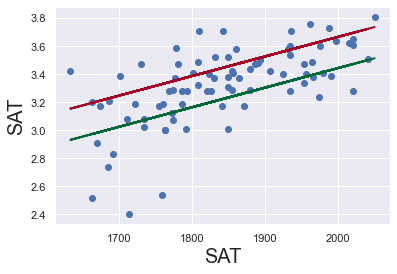

In [27]:
plt.scatter(data['SAT'],y)
yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']
fig = plt.plot(data['SAT'],yhat_no, lw=2, c = '#006837')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c = '#a50026')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('SAT', fontsize = 20)
plt.show()

##### certainly we can parameterrize this equation but there's no need for such a simple example. 
##### so what we observed are two equations that have thesame slope but different intercept. which implies that student who attended spread around the upper line, while theopposite are below. On average the GPA of students who attended is 0.2226(dummy coef) higher than students who did not attend. we can even think about this are two seperate regressions. 
##### let's color the points of the two plots

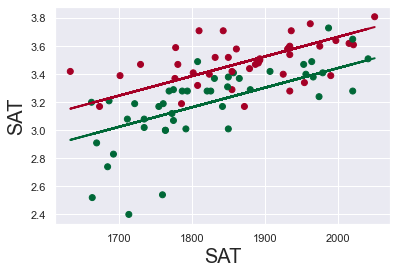

In [29]:
plt.scatter(data['SAT'],y, c=data['Attendance'],cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']
fig = plt.plot(data['SAT'],yhat_no, lw=2, c = '#006837')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c = '#a50026')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('SAT', fontsize = 20)
plt.show()

###### finally i will still put the original regression line

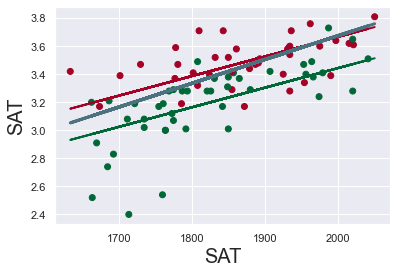

In [31]:
plt.scatter(data['SAT'],y, c=data['Attendance'],cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']
yhat = 0.0017 * data['SAT'] + 0.275
fig = plt.plot(data['SAT'],yhat_no, lw=2, c = '#006837', label='regression line1')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c = '#a50026', label='regression line2')
fig = plt.plot(data['SAT'],yhat, lw=3, c = '#4C7280', label='regression line')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('SAT', fontsize = 20)
plt.show()

#### GPA = 0.8665 + 0.0014 * SAT
#### GPA = 0.6439 + 0.0014 * SAT
#### GPA = 0.275 + 0.0017 * SAT.

##### now to use this models for prediction purposes we need two pieces of informatons, which are
## SAT score and if the person attended more than 70% ie[SAT and Attendance].

##### Ready to make a predict ion? there's a statsModel which takes a data frame organized in same way as X, and then make predictions.
### we worked with x during our regression right? yeah let's check it out.

In [32]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


###### of course x is a dataframe with three columns, const which we added during our code with add conatnt method(x = sm.add_constant(x1) as i said ealier it's a simulation of x zero that contains only ones) SAT and Attendance. Alright let's create a dataframe we'll use for predictions and organize it in same way as X, with three columns [constant, SAT and Attendance], we'll check two students, Bob who got 1700 on SAT and did NOT attend 75% of the lectures. And  Alice, who got 1670 on SAt and attended more than 75% of the lectures.
##### in terms of coding the new variable will be called new_data and the pandas will be a dataframe, first column is called const and it's always 1, and the second entry is the SAT which has two entries 1700 and 1670, the third column has two entries which has Attendance with 0 and 1

In [38]:
new_data = pd.DataFrame({'const':1, 'SAT':[1700,1670], 'Attendance':[0,1]})
new_data = new_data[['const', 'SAT', 'Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


##### the method that allows us to make a prediction is{fit which is our result.predict}. the fit regression is in the variable results = sm.OLS(y,x).fit().
#### predict(new_data) method has a single argument called vatriable name

In [40]:
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

##### now let's add the names of the characters involved for pediction

In [45]:
predictionsdf = pd.DataFrame({'predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index = {0:'Bob', 1: 'Alice'})

,const,SAT,Attendance,predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163


##### of course we know that Alice scored lower on SAT, but she attended > 75% of lectures. that makes sense, but let's see actually we need a dummy. imagine if we used our previouse model without the dummy variable this would be the case: 
## GPA = 0.275 + 0.0017 * SAT.
##### thus this would have predicted that Bob will graduate with a higher GRADE of 3.17 and Lex with 3.12, this why we need  the dummy variable 